In [9]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import cv2
from sklearn.pipeline import Pipeline
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

In [10]:
train_images = os.listdir('train')
features = []
labels = []
image_size = (50, 50)
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread('train'+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|██████████| 25000/25000 [03:46<00:00, 110.34it/s]


In [11]:
features = np.asarray(features)
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [12]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train.ravel()) 

C:\Users\Rithvika\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Rithvika\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

<Axes: >

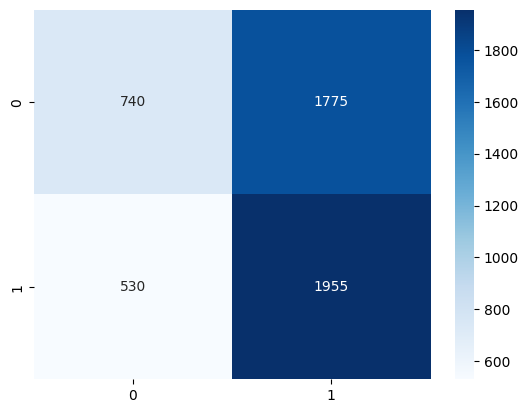

In [13]:
y_predict_test=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues")

In [14]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      2515
           1       0.52      0.79      0.63      2485

    accuracy                           0.54      5000
   macro avg       0.55      0.54      0.51      5000
weighted avg       0.55      0.54      0.51      5000

